<a href="https://colab.research.google.com/github/kunamneni117/Introduction-To-Machine-Learning/blob/master/Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator,TransformerMixin

In [5]:
!pip install sklearn_features

In [0]:
from sklearn_features.transformers import DataFrameSelector
from sklearn.pipeline import Pipeline,FeatureUnion

In [0]:
MNIST_Data = pd.read_csv('/content/train.csv')

In [8]:
print(MNIST_Data.shape)

(42000, 785)


In [0]:
MNIST_Data_Features = MNIST_Data.values[:,1:]
MNIST_Data_Labels = MNIST_Data.values[:,0]

In [25]:
print(MNIST_Data_Features.shape,MNIST_Data_Labels.shape)

(42000, 784) (42000,)


In [0]:
import matplotlib

In [0]:
def Random_Image(Data):
  """Picks a Random Row and reshapes the row in such a way and it prints a image"""
  Random_Row = np.random.randint(len(Data))
  plt.imshow(Data[Random_Row].reshape(28,28),cmap=matplotlib.cm.binary)

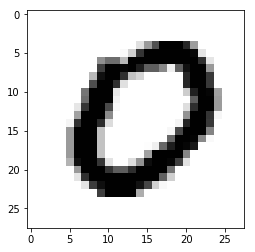

In [27]:
Random_Image(MNIST_Data_Features)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(MNIST_Data_Features,MNIST_Data_Labels,random_state=42,test_size=0.22)

In [30]:
print(X_Train.shape,X_Test.shape)

(32760, 784) (9240, 784)


Creating a Binary Classifier Model and training to predict 5 integer and non 5 integer

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
Y_Train_5 = (Y_Train==5)
Y_Test_5 =(Y_Test==5)

In [0]:
SGD_classifier_Object = SGDClassifier(random_state=42)

In [33]:
SGD_classifier_Object.fit(X_Train,Y_Train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
Y_Pred = SGD_classifier_Object.predict(X_Test)

Implementing StratifiedKflod Cross Validation Method

In [0]:
from sklearn.model_selection import StratifiedKFold

In [0]:
from sklearn.base import clone

In [0]:
skfolds = StratifiedKFold(n_splits=3,random_state=42)

In [37]:
for train_index,test_index in skfolds.split(X_Train,Y_Train_5):
  X_Train_kflod = X_Train[train_index]
  X_Test_kflod = X_Train[test_index]
  Y_Train_kflod = Y_Train_5[train_index]
  Y_Test_kflod = Y_Train_5[test_index]
  SGD_Classifier_Clone = clone(SGD_classifier_Object)
  SGD_Classifier_Clone.fit(X_Train_kflod,Y_Train_kflod)
  Y_Pred_kflod = SGD_Classifier_Clone.predict(X_Test_kflod)
  n_correct = sum(Y_Pred_kflod==Y_Test_kflod)
  print(n_correct/len(Y_Test_kflod))

0.964197417818881
0.9561355311355312
0.9610770217052844


From this we thought of the model is very accurate BUT....

For Classification we use another set of tools for measuring the goodness of the  model

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [40]:
confusion_matrix(Y_Pred,Y_Test_5)

array([[8111,  105],
       [ 354,  670]])

In the Above matric 8111 is the True Negative and 105 is the false positive
354  is false negative and 670 is true positive

Precision = TP/TP+ FP
Recall = TP/TP+FN

In [0]:
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,roc_auc_score,roc_curve

In [42]:
precision_score(Y_Pred,Y_Test_5)

0.864516129032258

In [43]:
recall_score(Y_Pred,Y_Test_5)

0.654296875

In [0]:
from sklearn.metrics import f1_score

In [45]:
f1_score(Y_Pred,Y_Test_5)

0.7448582545858811

F1Score is the Harmonic mean of Precision and Recall and acts a powerful indication of the wellness of the model

increasing	precision	reduces	recall,	and	vice	versa.	This	is called	the	precision/recall	tradeoff

	SGDClassifier	makes	its	classification	decisions.	For each	instance,	it	computes	a	score	based	on	a	decision	function,	and	if	that	score	is	greater	than	a threshold,	it	assigns	the	instance	to	the	positive	class,	or	else	it	assigns	it	to	the	negative	class.

In [46]:
precision_recall_curve(Y_Pred,Y_Test_5)

(array([0.11082251, 0.86451613, 1.        ]),
 array([1.        , 0.65429688, 0.        ]),
 array([False,  True]))

In [0]:
precisions,	recalls,	thresholds=precision_recall_curve(Y_Pred,Y_Test_5)

In [48]:
precisions

array([0.11082251, 0.86451613, 1.        ])

In [0]:
def	plot_precision_recall_vs_threshold(precisions,	recalls,	thresholds):
    plt.plot(thresholds,	precisions[:-1],	"b--",	label="Precision")				
    plt.plot(thresholds,	recalls[:-1],	"g-",	label="Recall")				
    plt.xlabel("Threshold")				
    plt.legend(loc="upper	left")				
    plt.ylim([0,	1])

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "upper	left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


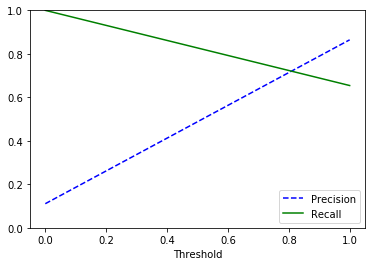

In [53]:
plot_precision_recall_vs_threshold(precisions,	recalls,	thresholds) 
plt.show()

In [0]:
roc_curve_sgd = roc_auc_score(Y_Pred,Y_Test_5)

In [56]:
roc_curve(Y_Pred,Y_Test_5)

(array([0.        , 0.01277994, 1.        ]),
 array([0.        , 0.65429688, 1.        ]),
 array([2, 1, 0]))

In [0]:
fpr,tpr,thresholds = roc_curve(Y_Pred,Y_Test_5)

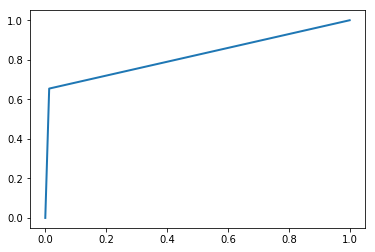

In [58]:
plt.plot(fpr,	tpr,	linewidth=2)	

In [59]:
fpr

array([0.        , 0.01277994, 1.        ])

In [60]:
tpr

array([0.        , 0.65429688, 1.        ])

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
RFClassifier = RandomForestClassifier(random_state=42)

In [65]:
proba_forest = cross_val_predict(RFClassifier,X_Train,Y_Train_5,cv=3,method='predict_proba')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [66]:
RFClassifier.fit(X_Train,Y_Train_5)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
Y_Pred_Forest = RFClassifier.predict(X_Test)

In [0]:
fpr_forest,tpr_forest,thresholds_forest = roc_curve(Y_Pred_Forest,Y_Test_5)

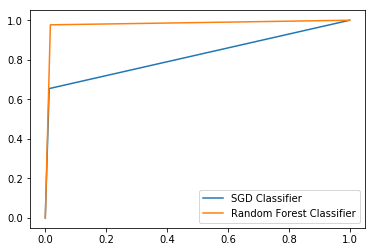

In [70]:
plt.plot(fpr,tpr,label='SGD Classifier')
plt.plot(fpr_forest,tpr_forest,label='Random Forest Classifier')
plt.legend()
plt.show()

Comparing the Models With ROC Curves to get the wellness of the model

In [71]:
roc_auc_score(Y_Pred,Y_Test_5)

0.820758466711295

In [72]:
roc_auc_score(Y_Pred_Forest,Y_Test_5)

0.9800873109218153

The more the ROC_AUC the good the model issssssssss..................